Отчет по алгоритму кластеризации KMeans.
План:
1. Написать функции и запустить ее на простейших данных (пузырях)
2. Сравнить полученный результат с ответом.
3. Протестировать на разном кол-ве точек и признаков с разной стратегией инициализации.
4. Построить матрицы попарных расстояний.
5. Протестировать на данных других форм.
6. Протестировать на реальных данных.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import make_blobs, make_moons, make_circles

print ("success import")
pass

success import


Output X 
[[-1.62313406  8.87720831  4.84001326]
 [ 1.71267112 -5.15279335 -6.78367587]
 [-1.94449656  8.37968109  5.63563107]
 [-8.99181204  8.71078033  3.16892415]
 [-4.30124272  8.56751262  5.84480176]]
Output Y 
[0 1 0 2 0]


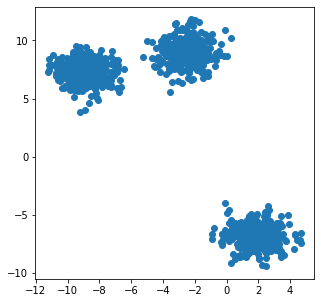

In [2]:
X, y = make_blobs(n_samples=1000, n_features=3, random_state=42)
print ("Output X \n{}".format (X[:5]))
print ("Output Y \n{}".format (y[:5]))
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1])

pass

Далее - основная функция k_means.

Аргументы:
§ - значение по умолчанию.

X - данные, которые мы будем кластеризовать.

n_clusters = 3§ - количество требуемых кластеров.

init = “std” § / “kmeans++” - тип начальной генеарции центроид. При “std” они генерируются случайным образом (т.е. я беру случайную точку данных и считаю ее центроидом). При “kmeans++” случайно выбирается первая центровка, а последующие выбираются, как наиболее удаленные от центра масс уже выбранных центроид. Т.о. вероятность правильной кластеризации вырастает. (Конечно это не совсем алгоритм kmeans++, мы находим нt наиболее удаленные от полученных центроид, а наиболее удаленные от их среднего арифметического). 

n_init = 0§ - количество центроид. (будет иметь значение в последующей модификации функции).

limit = 200§ - предельное количество итерации

print_count = 0$/1 - опция вывода кол-ва итераций.

random_state=None§ - инициализация random.seed.

Возвращает массив numpy - кластеры точек.

Number of iteration =  4


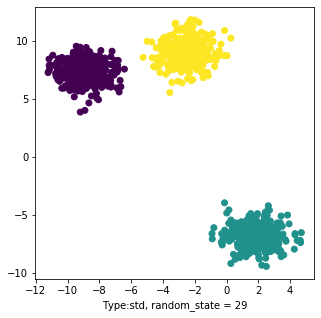

In [3]:
def k_means(X, n_clusters=3, init="std" ,n_init = 0, limit = 200, print_count = 0, random_state=None):
    if init != "std" and init != "kmeans++":
        print ("Error init: 'std' or 'kmeans++' only")
        return None
    if n_clusters < 1 :
        n_clusters = 1
    if n_init == 0:
        n_init = n_clusters
    centroids = np.zeros((n_init, X.shape[1]))
    np.random.seed(random_state)
    #initialization centroids
    if init == "std":
        centroids = X[np.random.randint(0, X.shape[0], n_init)]
    else:
        #kmeans++
        centroids[0] = X[np.random.randint(0, X.shape[0])]
        for i in range(1, n_init): 
            centroids[i] = X[np.argmax(np.sum( (X[:] - np.sum(centroids, axis=0) / n_init) ** 2, axis = 1))]   
   
    #result array
    clusters = np.empty(X.shape[0], dtype="int")
    temp = np.empty(n_init) 
    count = 1
    while(True):
        #point clustering
        for i in range(X.shape[0]):
            for j in range(n_init):
                    temp[j] = np.sum((X[i] - centroids[j]) ** 2)
            clusters[i] = np.argmin(temp) 
        #flag to control convergence
        flag = 0
        
        #correct centroids
        for i in range(n_init):
            buf = np.sum(X[clusters == i], axis=0) / np.count_nonzero(clusters == i)
            if not (np.array_equal(centroids[i] , buf)):
                flag = 1
                centroids[i] = buf
        
        if flag == 0:
            break
        #counter iteration
        count += 1
        if count > limit:
            if print_count != 0:    
                print ("interrupt by counter")
            break
            
    """
    # пытался модифицировать алгоритм, чтобы изначально инициализировалось больше центроид, чем кластеров,
    # но алгоритм работает неправильно (больше кластеров, чем нужно), не смог локализовать ошибку.
    if n_init > n_clusters:
        
        differ = n_init - n_clusters
        while (differ > 0):
            matr = (centroids[:,0] - centroids[:,0][:, np.newaxis]) ** 2
            for i in range(1, X.shape[1]):
                matr += (centroids[:,i] - centroids[:,i][:, np.newaxis]) ** 2
            matr = np.sqrt(matr)
            spec = np.eye(matr.shape[0]) * 1000
            matr += spec
            #print (matr)
            index = np.unravel_index(np.argmin(matr, axis=None), matr.shape)
            clusters[clusters == index[1]] = index[0]
            print (matr)
            
            centroids = np.delete(centroids, index[1], axis=0)
            
           
            print ("yes")
            
            differ -= 1
    """ 
        
    if print_count != 0:
        print("Number of iteration = " , count)
    return clusters

clusters = k_means(X, init= "std", n_clusters = 3, print_count = 1, random_state = 29)

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.xlabel("Type:std, random_state = 29")
pass

Сравним полученный результат с правильным.

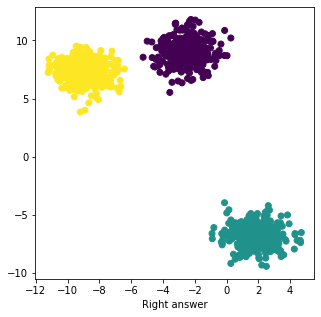

In [4]:
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Right answer")
pass

Теперь сравним получившийся результат со алгоритмом KMeans, представленным в sklearn.

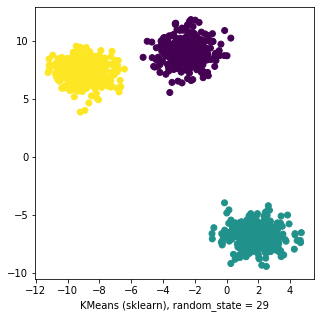

In [5]:
from sklearn.cluster import KMeans 
sk_clusters = KMeans(n_clusters=3, random_state=29).fit_predict(X)
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=sk_clusters)
plt.xlabel("KMeans (sklearn), random_state = 29")
pass

Мы видим, что при таких начальных значениях, результат верный.
Но если random проинициализировать другим числом, то алгоритм работает неправильно.

Number of iteration =  18


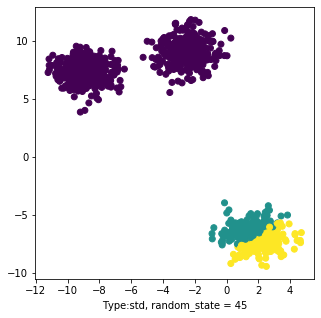

In [6]:
clusters = k_means(X, init= "std", n_clusters = 3, print_count = 1, random_state=45)

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.xlabel("Type:std, random_state = 45")
pass

Теперь попробуем запустить немного модифицированный алгоритм.
Хотя я и назвал его kmeans++, это не совсем он, так как при инициализации центроид, алгоритм ищет не максимально удаленный от предыдущих, а максимальной удаленный от "центра масс" уже найденных центроид.

Number of iteration =  3


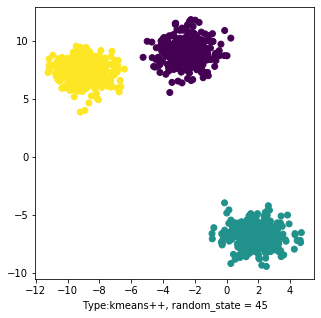

In [7]:
clusters = k_means(X, init= "kmeans++", print_count = 1, random_state=45)

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.xlabel("Type:kmeans++, random_state = 45")
pass

Как видно, модифицированный алгоритм справился с этой проблемой.

Но и для него есть непосильные задачи: при random_state=42 он выдает такой же неправильный ответ, как и стандартный алгоритм.

Number of iteration =  13


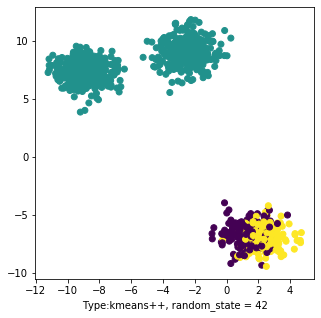

In [8]:
clusters_error = k_means(X, init= "kmeans++", n_clusters = 3, print_count = 1, random_state=42)

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=clusters_error)
plt.xlabel("Type:kmeans++, random_state = 42")
pass

Рассмотрим как работает наш алгоритм на различных данных:

Проверим его на точках с большим количеством признаков и не очень большим количеством точек.

Number of iteration =  2


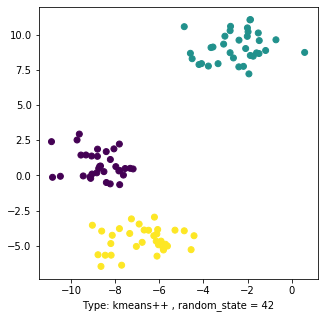

In [9]:
X_d, y_d= make_blobs(n_samples=100, n_features=300, random_state=42)

clusters_d = k_means(X_d, init= "kmeans++", print_count = 1, random_state=29)
plt.figure(figsize=(5,5))
plt.scatter(X_d[:, 0], X_d[:, 1], c=clusters_d)
plt.xlabel("Type: kmeans++ , random_state = 42")
pass

А теперь проверим на данных с малым количеством признаков, но с большим количеством точек.

Number of iteration =  4


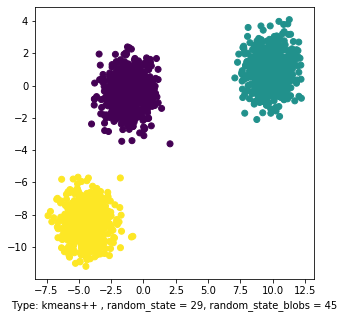

In [10]:
X_d, y_d= make_blobs(n_samples=2000, n_features=2, random_state=45)

clusters_d = k_means(X_d, init= "kmeans++", print_count = 1, random_state=29)
plt.figure(figsize=(5,5))
plt.scatter(X_d[:, 0], X_d[:, 1], c=clusters_d)
plt.xlabel("Type: kmeans++ , random_state = 29, random_state_blobs = 45")
pass

К сожалению, при другой инициализации random.seed, алгоритм ошибается.

Number of iteration =  14


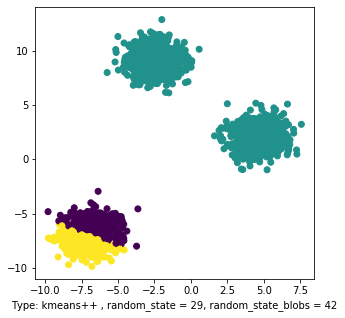

In [11]:
X_d, y_d= make_blobs(n_samples=2000, n_features=2, random_state=42)

clusters_d = k_means(X_d, init= "kmeans++", print_count = 1, random_state=29)
plt.figure(figsize=(5,5))
plt.scatter(X_d[:, 0], X_d[:, 1], c=clusters_d)
plt.xlabel("Type: kmeans++ , random_state = 29, random_state_blobs = 42")
pass

Из этих примеров видно, что на простых данных (независимо от кол-ва точек) алгоритм сходится очень быстро.

Теперь сформируем матрицы попарных расстояний до кластеризации и после.

Для формирования матрицы после кластеризации, отсортируем индексы полученного массива кластеров, а затем по этому массиву отсортируем матрицу точек.

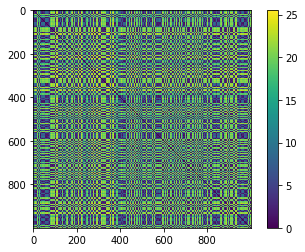

In [12]:
matr = (X[:,0] - X[:,0][:, np.newaxis]) ** 2
for i in range(1, X.shape[1]):
    matr += (X[:,i] - X[:,i][:, np.newaxis]) ** 2
matr = np.sqrt(matr)

plt.imshow(matr)
plt.colorbar(orientation='vertical');

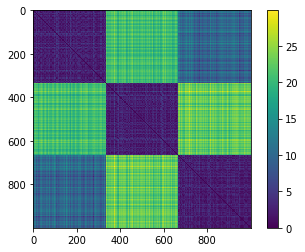

In [13]:
sort_mask  = np.argsort(clusters)
sorted_X = X[sort_mask, :]

matr = (sorted_X[:,0][:, np.newaxis] - sorted_X[:,0]) ** 2
for i in range(X.shape[1]):
    matr += (sorted_X[:,i][:, np.newaxis] - sorted_X[:,i]) ** 2
matr = np.sqrt(matr)

plt.imshow(matr)
plt.colorbar(orientation='vertical');

Рассмотрим как работает наш алгоритм на других данных.

Number of iteration =  5


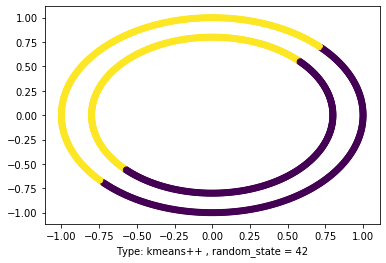

In [14]:
X_c, y_c = make_circles(n_samples = 1000,  random_state = 42 )


clusters_c = k_means(X_c, init= "kmeans++", n_clusters = 2, print_count = 1, random_state=42)

plt.scatter(X_c[:, 0], X_c[:, 1], c=clusters_c)
plt.xlabel("Type: kmeans++ , random_state = 42")
pass

Теперь сравним с правильным ответом.

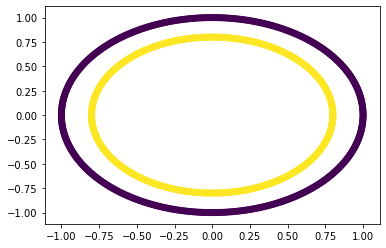

In [15]:
plt.scatter(X_c[:, 0], X_c[:, 1], c=y_c)
pass

Видно, что наш алгоритм с этой работой не справился.

А вот какой результат выдает KMeans описанный в sklearn.

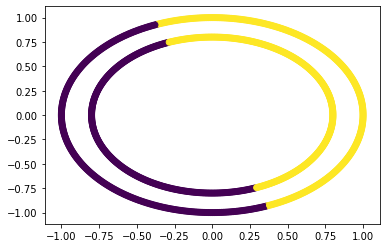

In [16]:
sk_clusters_c = KMeans(n_clusters=2, random_state=0).fit_predict(X_c)
plt.scatter(X_c[:, 0], X_c[:, 1], c=sk_clusters_c)
pass

Теперь сгенерируем точки в виде "полумесяца".

Number of iteration =  6


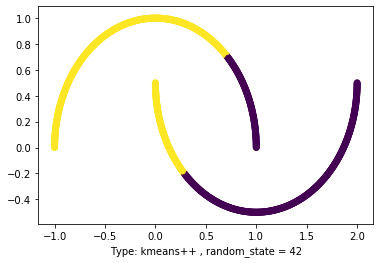

In [17]:
X_m, y_m = make_moons(n_samples = 1000,  random_state = 42 )


clusters_m = k_means(X_m, init= "kmeans++", n_clusters = 2, print_count = 1, random_state=42)

plt.scatter(X_m[:, 0], X_m[:, 1], c=clusters_m)
plt.xlabel("Type: kmeans++ , random_state = 42")
pass

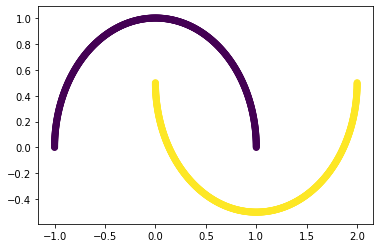

In [18]:
plt.scatter(X_m[:, 0], X_m[:, 1], c=y_m)
pass

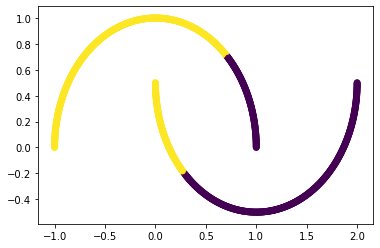

In [19]:
sk_clusters_m = KMeans(n_clusters=2, random_state=0).fit_predict(X_m)
plt.scatter(X_m[:, 0], X_m[:, 1], c=sk_clusters_m)
pass

Как мы можем заметить, KMeans плохо работает с данными "не сферического вида".

Теперь сравним время работы нашего, алгоритма с временем работы алгоритма sklearn

In [20]:
%timeit KMeans(n_clusters=3, random_state=0).fit_predict(X)

22.2 ms ± 165 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [21]:
%timeit k_means(X, init= "kmeans++", random_state=29)

102 ms ± 4.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Мой алгоритм работает значительно медленнее.

Пришло время опробовать мой алгоритм на серьезных данных, а не на банальных синтетических "пузырях".
Для этого я скачал датасет с kaggle.
Ссылка: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

Задача: кластеризовать клиентов магазина.
Дано: Фрейм: столбцы: пол, возраст, годовой доход (в тыс. долларах), оценка расходов (от 1 до 100).
План решения:
1. Оценить качество данных, обработать для более правильного использования алгоритма.
2. Визуализировать данные.
3. Оценить необходимое кол-во кластеров.
4. Запустить алгоритм на различных входных значениях.
5. Оценить качество работы алгоритма.
6. Сравнить результат со стандартным алгоритмом KMeans в sklearn.

In [22]:
import pandas as pd
#help(pd.read_csv)
types = {'CustomerID': np.dtype(int), 'Gender': np.dtype(str), 'Age' : np.dtype(int), 'Annual Income (k$)': np.dtype(int), 'Spending Score (1-100)': np.dtype(int) }
data = pd.read_csv('./Mall_Customers.csv' , sep=';', decimal=',')
print (data.shape)
data.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Теперь преобразуем данные, чтобы можно было воспользоваться нашим алгоритмом.

Для этого удалим столбец индексирования и "оцифруем" столбец отвечающий за пол.

In [23]:
data["Gender"][data["Gender"] == "Male"] = 0
data["Gender"][data["Gender"] == "Female"] = 1
data.Gender = pd.to_numeric(data.Gender)
del data['CustomerID']
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


Теперь отобразим наши данные на различных диаграммах рассеивания.

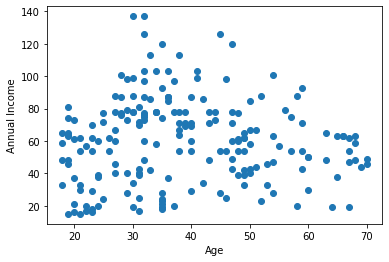

In [24]:
plt.scatter(data.iloc[:, 1], data.iloc[:, 2])
plt.xlabel("Age")
plt.ylabel("Annual Income")
pass

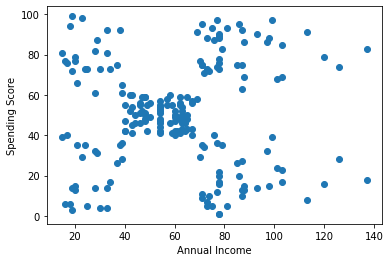

In [25]:
plt.scatter(data.iloc[:, 2], data.iloc[:, 3])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
pass

А теперь изобразим вывести 3d диаграмму.

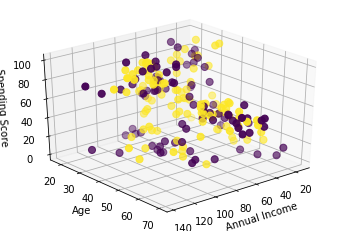

In [26]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data.iloc[:, 2], data.iloc[:, 1], data.iloc[:,3], c=data.iloc[:,0] , s=50)
ax.set_xlabel('Annual Income')
ax.set_ylabel('Age')
ax.set_zlabel('Spending Score')
ax.view_init(30, 50)
plt.show()

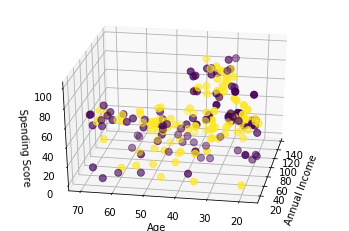

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data.iloc[:, 2], data.iloc[:, 1], data.iloc[:,3], c=data.iloc[:,0] , s=50)
ax.set_xlabel('Annual Income')
ax.set_ylabel('Age')
ax.set_zlabel('Spending Score')
ax.view_init(30, 190)
plt.show()

Теперь необходимо определить число кластеров.
По этим данным довольно трудно дать однозначную оценку.
Вообще, выбор числа кластеров - очень субъективен. Обычно число определяется из нематематических признаков или для определенной задачи. (например разбить всех покупателей на k групп).

Когда число кластеров заранее неизвестно, нужно постараться максимально удобно визуализировать данные, примерно определить границы возможно кластеров и на основе этого выбрать число.

Визуально, кажется наиболее оптимальный вариант для этой задачи - брать 4 кластера.

interrupt by counter
Number of iteration =  201


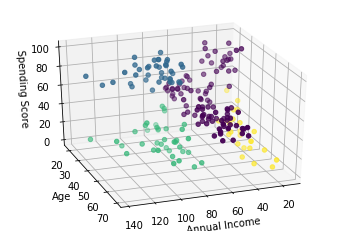

In [28]:
#необходимо переформатировать наши данные в массив numpy
dataset = data.values

clusters_customers = k_means(dataset, init= "std", n_clusters = 4, limit = 200, print_count = 1, random_state=42)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data.iloc[:, 2], data.iloc[:, 1], data.iloc[:,3], c=clusters_customers , s=20)
ax.set_xlabel('Annual Income')
ax.set_ylabel('Age')
ax.set_zlabel('Spending Score')
ax.view_init(30, 70)
plt.show()

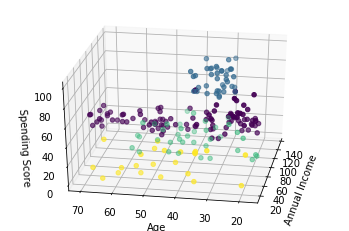

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data.iloc[:, 2], data.iloc[:, 1], data.iloc[:,3], c=clusters_customers , s=20)
ax.set_xlabel('Annual Income')
ax.set_ylabel('Age')
ax.set_zlabel('Spending Score')
ax.view_init(30, 190)
plt.show()

К сожалению мой алгоритм до конца не сходится и останавливается когда превышен счетчик итераций. Скорее всего, из-за того, что данные достаточно сложны. Т.е. на больших данных, однозначно не распределяемых на кластеры, алгоритм сходится очень долго. Методом экспериментов проверим, что и при значительно больших лимитах на счетчик, алгоритм выдает схожий ответ. Если ответы будут равны, будем считать, что ответ получен.
Сейчас я запущу алгоритм на limit = 1000, и сравню получившиеся массивы.

In [30]:
check = k_means(dataset, init= "std", n_clusters = 4, limit = 1000, print_count = 1, random_state=42)

interrupt by counter
Number of iteration =  1001


In [31]:
check -= clusters_customers
check

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

Следовательно и на limit = 200 и на limit = 1000 - результат эквивалентен.

Теперь сравним с результатом sklearn.

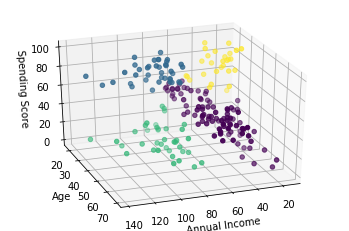

In [32]:
sk_clusters_c = KMeans(n_clusters=4, random_state=40).fit_predict(data)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data.iloc[:, 2], data.iloc[:, 1], data.iloc[:,3], c=sk_clusters_c , s=20)
ax.set_xlabel('Annual Income')
ax.set_ylabel('Age')
ax.set_zlabel('Spending Score')
ax.view_init(30, 70)
plt.show()

Попробуем снова запустить наш алгоритм, но с другой инициализацией random.

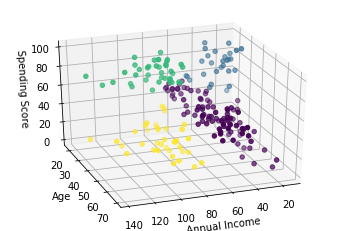

In [33]:
clusters_customers = k_means(dataset, init= "std", n_clusters = 4,  limit = 200, print_count = 0, random_state=40)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data.iloc[:, 2], data.iloc[:, 1], data.iloc[:,3], c=clusters_customers , s=20)
ax.set_xlabel('Annual Income')
ax.set_ylabel('Age')
ax.set_zlabel('Spending Score')
ax.view_init(30, 70)
plt.show()

Кластеры практически совпадают!

Как можно заметить, алгоритмы не всегда выдают одинаковый результат.

Но нельзя с абсолютной уверенностью сказать, какой результат правильный, а какой нет.
Также важно, что данные не сферической формы и как мы уже выяснили, алгоритм kmeans не всегда правильно решает такие задачи.

Теперь посмотрим результаты для другого кол-ва кластеров.

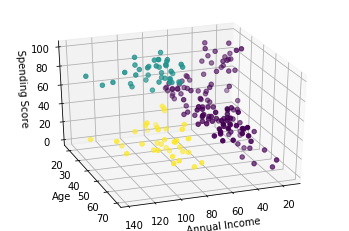

In [34]:
clusters_customers = k_means(dataset, init= "std", n_clusters = 3, limit = 200, print_count = 0, random_state=42)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data.iloc[:, 2], data.iloc[:, 1], data.iloc[:,3], c=clusters_customers , s=20)
ax.set_xlabel('Annual Income')
ax.set_ylabel('Age')
ax.set_zlabel('Spending Score')
ax.view_init(30, 70)
plt.show()

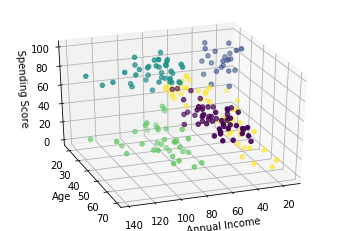

In [35]:
clusters_customers = k_means(dataset, init= "std", n_clusters = 5,  limit = 200, random_state=40)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data.iloc[:, 2], data.iloc[:, 1], data.iloc[:,3], c=clusters_customers , s=20)
ax.set_xlabel('Annual Income')
ax.set_ylabel('Age')
ax.set_zlabel('Spending Score')
ax.view_init(30, 70)
plt.show()

На мой взгляд, оптимальное кол-во кластеров для этой задачи - 4.

Таким образом мы убедились, что мой алгоритм работает и на более сложных данных и выдает приемлмый ответ.

Вывод:
Алгоритм k-means - достаточно популярный алгоритм. Он простой и легкий в понимани, работает сравнительно быстро.

Недостатки: зависимость от случайной инициализации (есть несколько решений: kmeans++, выбор лучшей инициализации из нескольких вариантов, большее кол-во центроид, чем кластеров и др.), строгие предположения о форме кластеров, необходимо знать заранее точное число кластеров.